## Compare Lasso with T-test

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

### Result of T-test

T-test analysis was performed by [ProSAP](https://github.com/hcji/ProSAP). Here, load the result directly. The result is corresponding to Panobinostat and Fimepinostat for K562 cell line. 

In [2]:
panob = pd.read_csv('data/t-test/t_test_fimep.csv')
fimep = pd.read_csv('data/t-test/t_test_panob.csv')

Since the result do not include gene name, we need add them based on the protein table.

In [3]:
protein_table = pd.read_csv('data/preprocessed/PL_K562_F.csv')

def add_gene_name(data):
    gene = []
    for i in data.index:
        acc = panob['Accession'][i]
        w = np.where(protein_table['Accession'] == acc)[0][0]
        g = protein_table['Gene Symbol'][w]
        gene.append(g)
    data['Gene Symbol'] = gene
    return data

panob = add_gene_name(panob)
fimep = add_gene_name(fimep)

Plot the ranking of HDAC1, which is the true target of Panobinostat and Fimepinostat

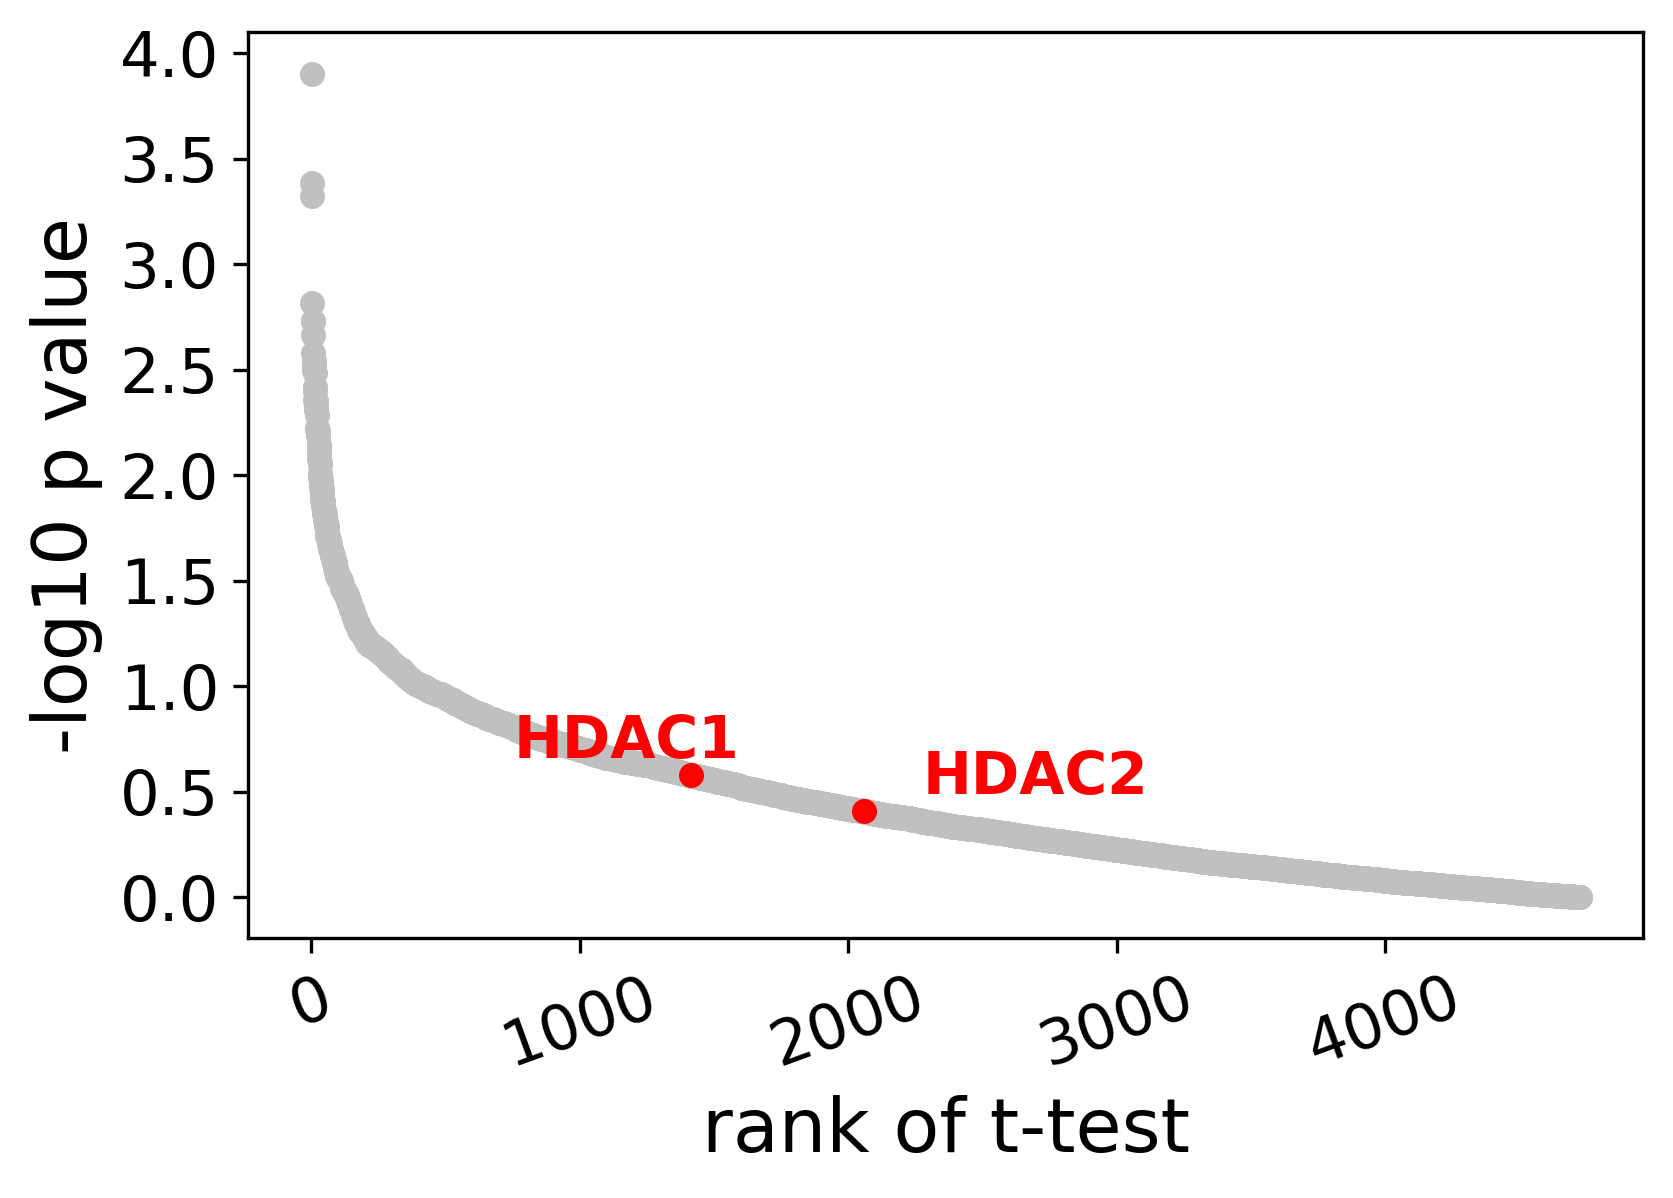

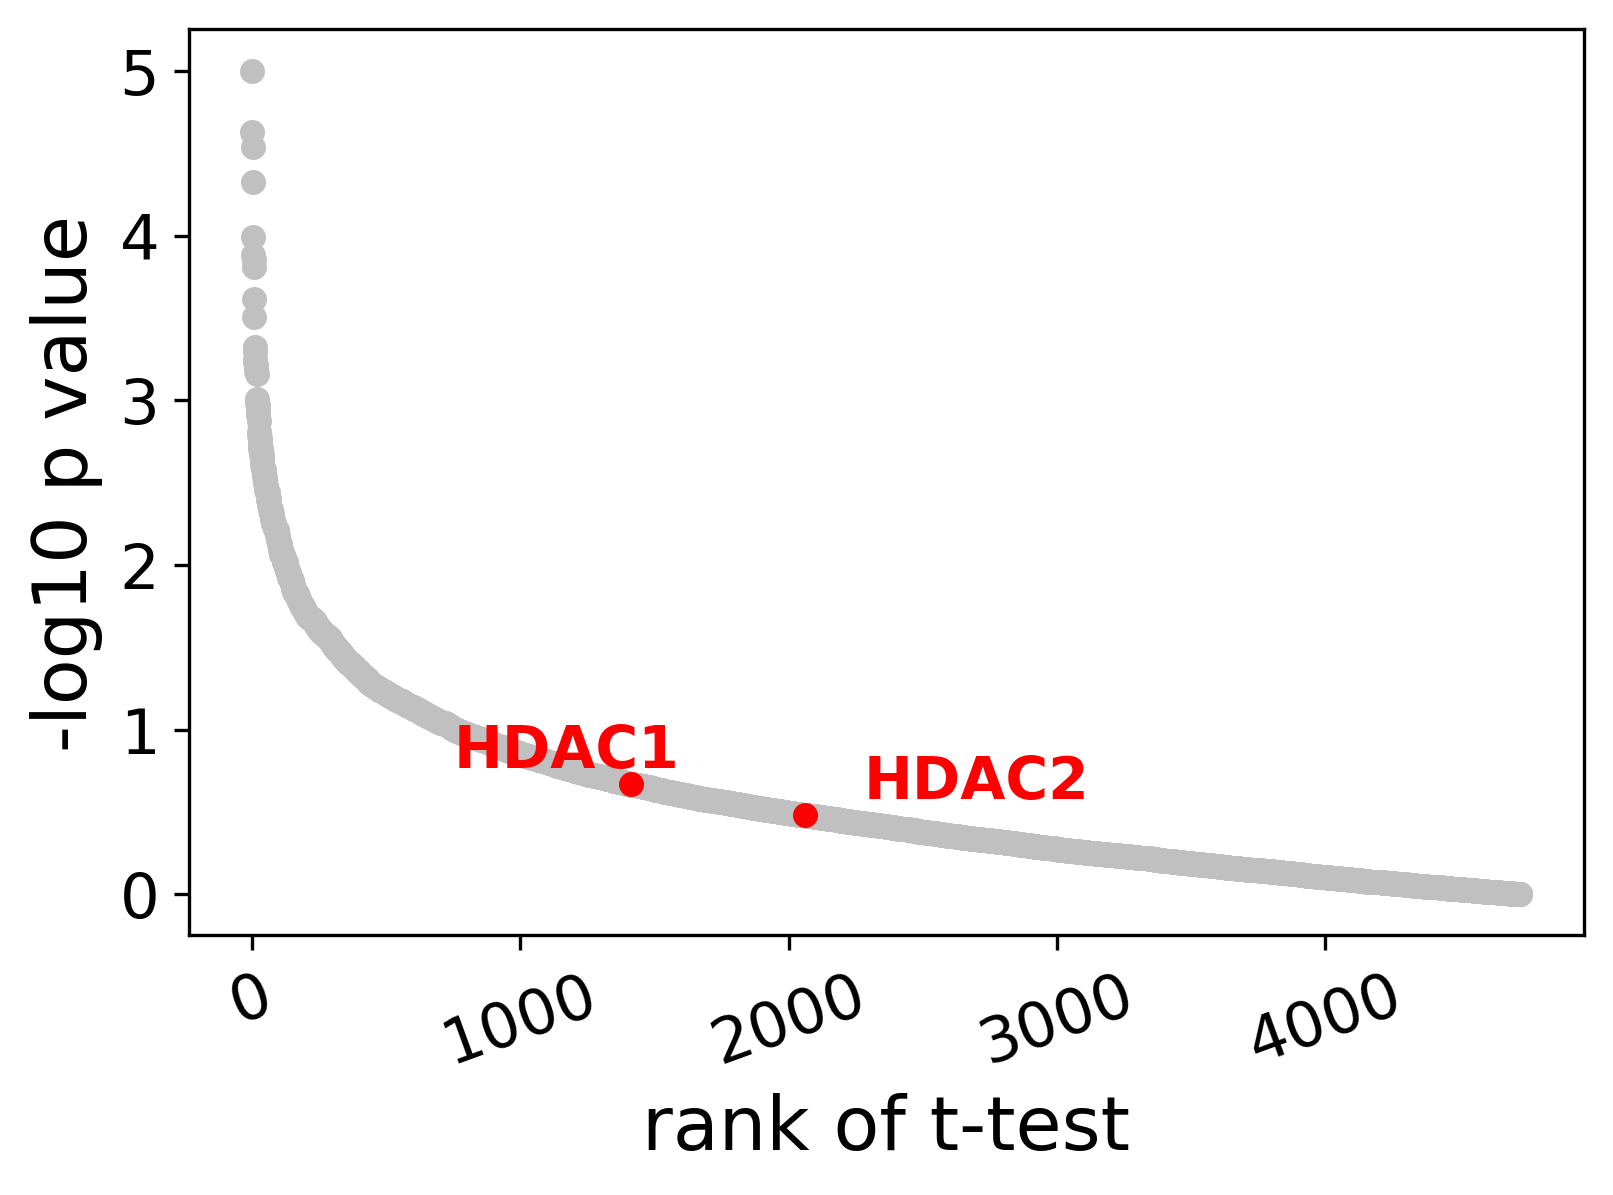

In [8]:
def plot_ranking(data, gene):
    w = np.array([i for i in data.index if data.loc[i, 'Gene Symbol'] in gene])
    data = data.sort_values(by = '-logPval', ascending = False)
    data = data.reset_index(drop = True)
    
    plt.figure(dpi = 300)
    plt.scatter(1 + np.arange(len(data)), data.loc[:,'-logPval'], s = 25, color = '#C0C0C0')
    plt.scatter(1 + w, data.loc[w,'-logPval'], color='#FF0000', s = 25)
    
    texts = []
    for i, s in enumerate(gene):
        x = w[i]
        y = data.loc[x,'-logPval']
        texts.append(plt.text(x+200, y, s, color = 'red', fontsize = 14, weight = 'semibold'))
    adjust_text(texts, force_points=0.01, force_text=0.01)

    plt.xlabel('rank of t-test', fontsize = 18)
    plt.ylabel('-log10 p value', fontsize = 18)
    plt.xticks(fontsize = 15, rotation=20)
    plt.yticks(fontsize = 15)


plot_ranking(panob, ['HDAC1','HDAC2'])
plot_ranking(fimep, ['HDAC1','HDAC2'])


### Result of Lasso

In [5]:
# load the processed result of K562 by Lasso
scores = pd.read_csv('results/PL_K562_F_scores.csv')
fold_changes = pd.read_csv('results/PL_K562_F_fold_changes.csv')

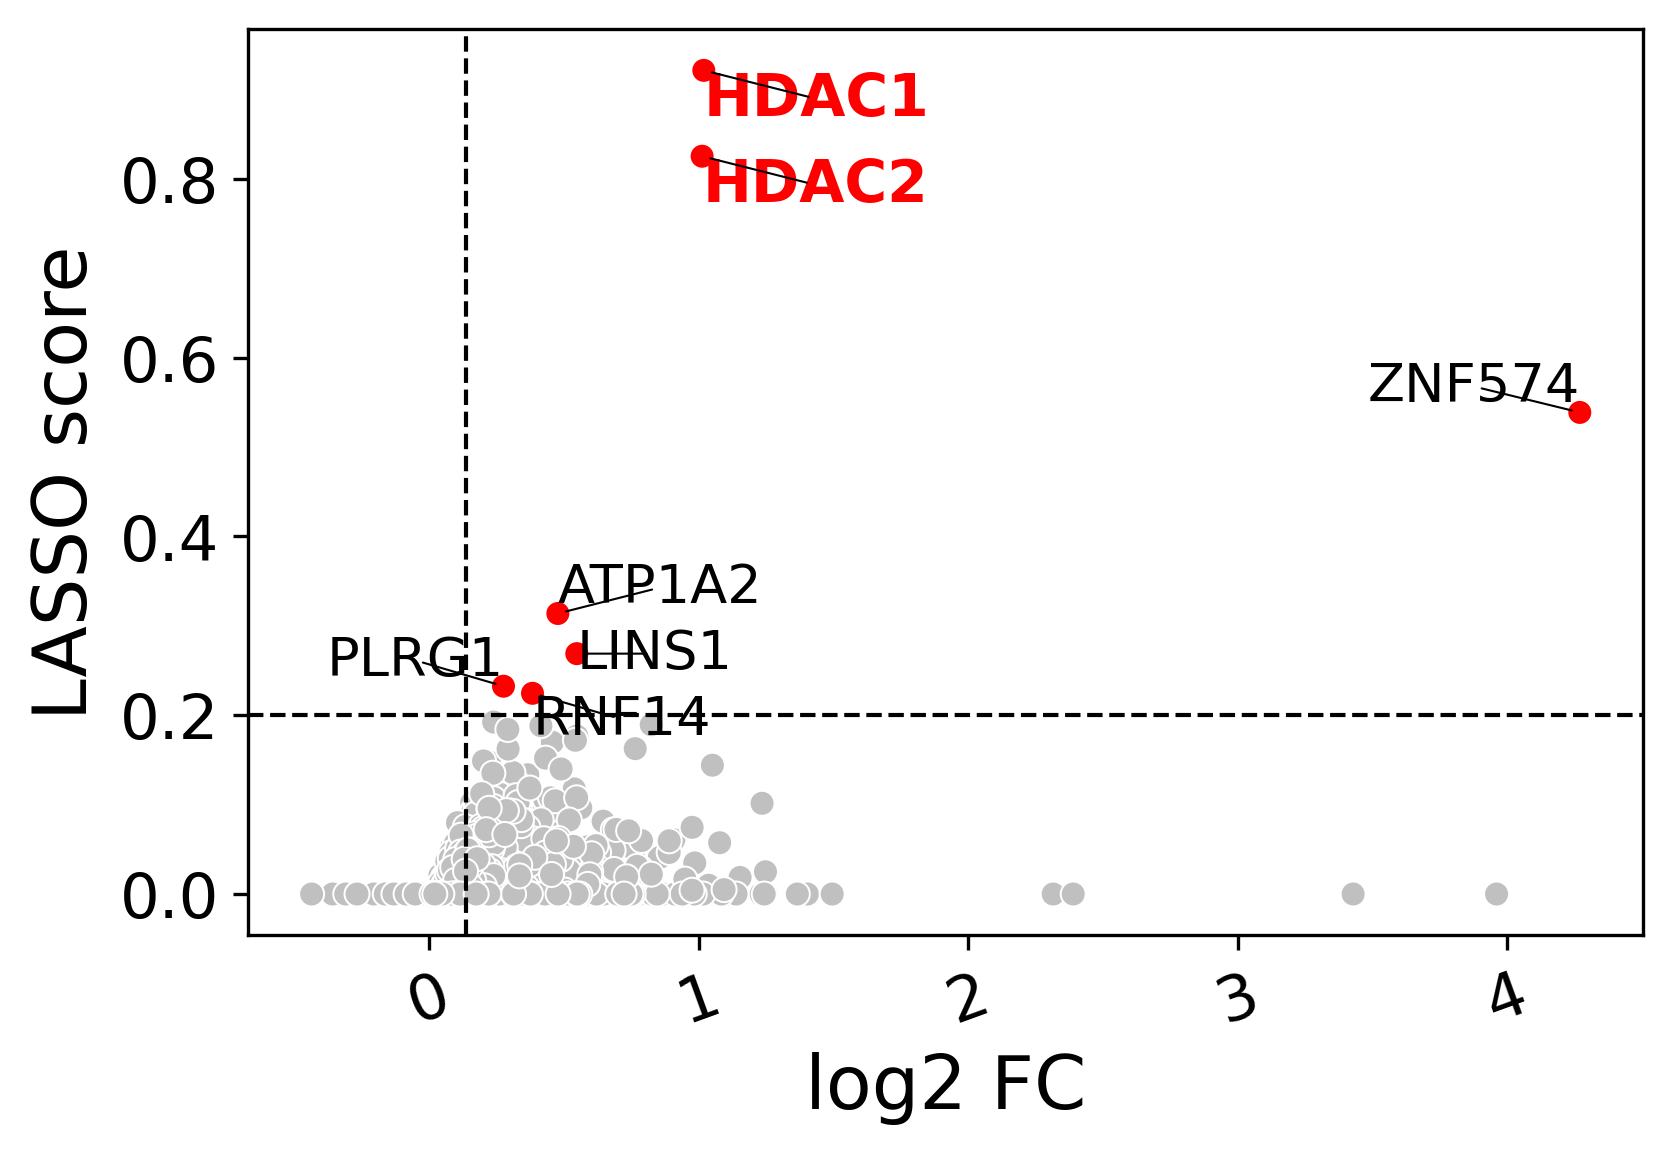

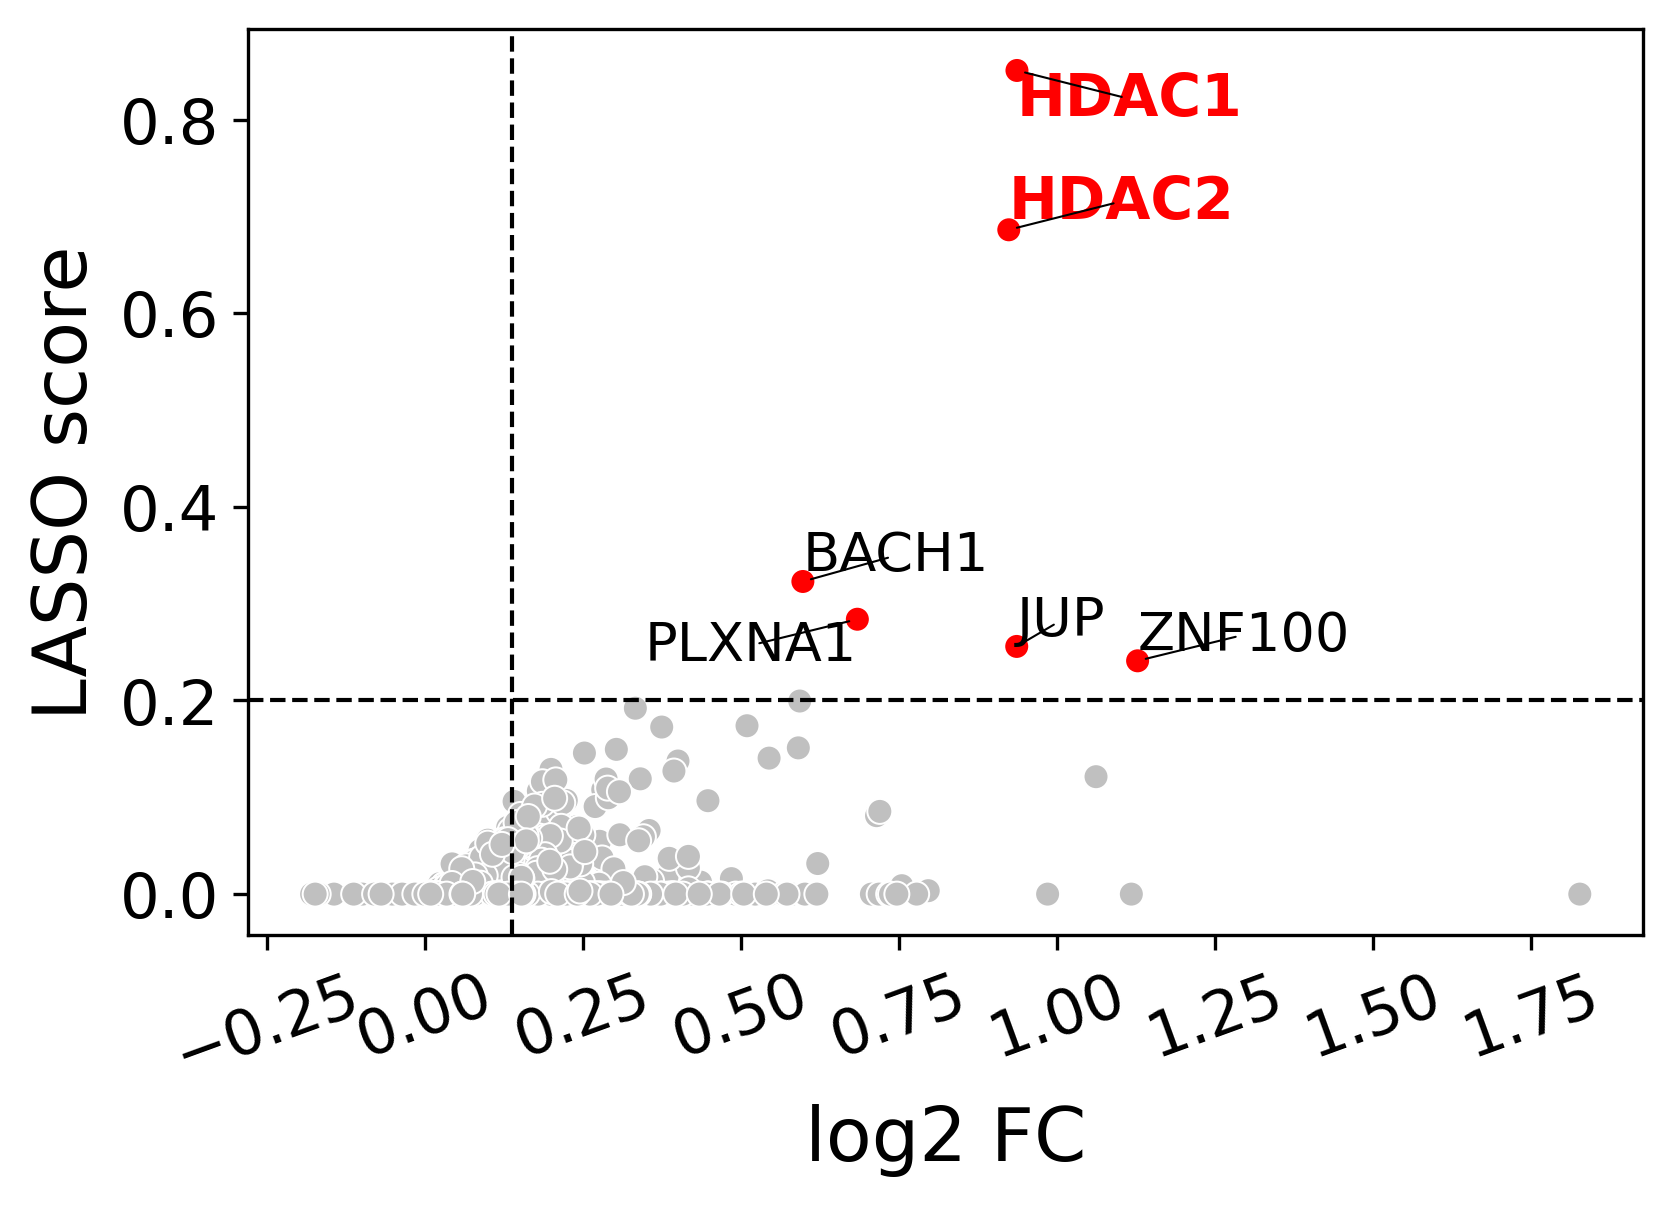

In [6]:
# plot the result
from core.core import *
plot_results('Panobinostat', scores, fold_changes, ['HDAC1', 'HDAC2'], fc_thres = 1.1, score_thres=0.2, top_markers = 8)
plot_results('Fimepinostat', scores, fold_changes, ['HDAC1', 'HDAC2'], fc_thres = 1.1, score_thres=0.2, top_markers = 8)